# Algoritmo Gradient Boosting Machines (GBM)

Para este ejemplo se utiliza [el conjunto de datos Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) incluído en la librería Scikit-learn.

In [1]:
# Librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Importa el conjunto de datos Iris
from sklearn.model_selection import train_test_split # Para crear conjuntos de entrenamiento y prueba
from sklearn.ensemble import GradientBoostingClassifier # Importa el algoritmo GBM Forest para clasificación
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Librerías para evaluación del modelo

In [2]:
# Carga el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# Crea el modelo GBM con un número de estimadores, para es ejemplo utilizamos 5
gb = GradientBoostingClassifier(
    n_estimators=5,
    learning_rate=1.0,
    max_depth=1,
    random_state=42
)

In [5]:
# Entrena el modelo usando los datos de entrenamiento
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=5,
                           random_state=42)

In [6]:
# Realiza predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

In [7]:
# Evaluación del modelo
print("Matrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReport de Clasificación:\n", classification_report(y_test, y_pred))

Matrix de Confusión:
 [[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]

Report de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [8]:
# Crea matriz de confusión, visualmente más clara
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=iris.target_names, columns=iris.target_names)
conf_matrix_df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,1,8


## Buscar el número óptimo de estimadores

In [9]:
# Probar diferentes valores de 'n_estimators' para GBM y registrar la exactitud
precisions = []
estimator_range = range(1, 101, 10)
for n_estimators in estimator_range:
    gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    precisions.append(accuracy_score(y_test, y_pred))

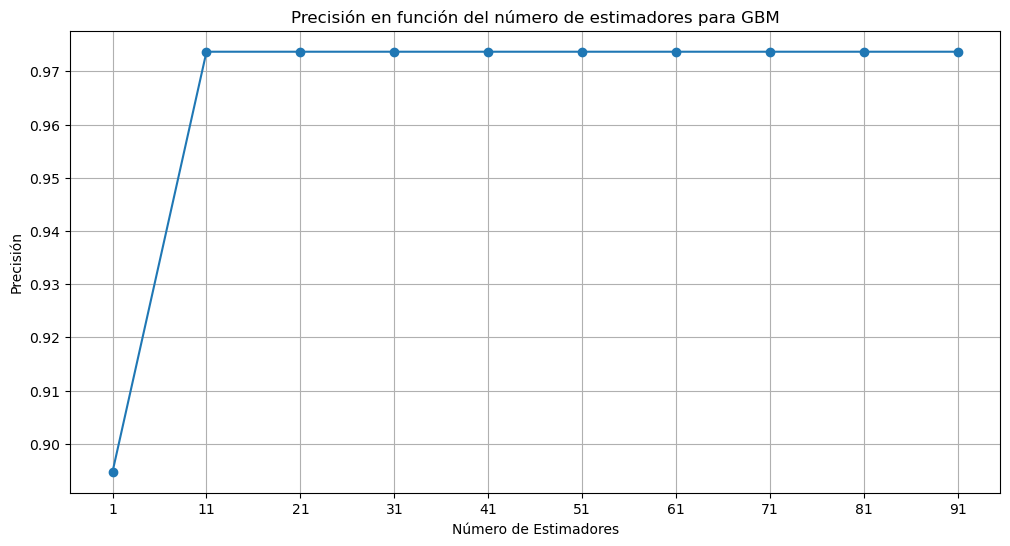

In [10]:
# Graficar la exactitud en función del número de estimadores
plt.figure(figsize=(12, 6))
plt.plot(estimator_range, precisions, marker='o')
plt.title('Precisión en función del número de estimadores para GBM')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión')
plt.xticks(estimator_range)
plt.grid(True)
plt.show()